In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Visualization

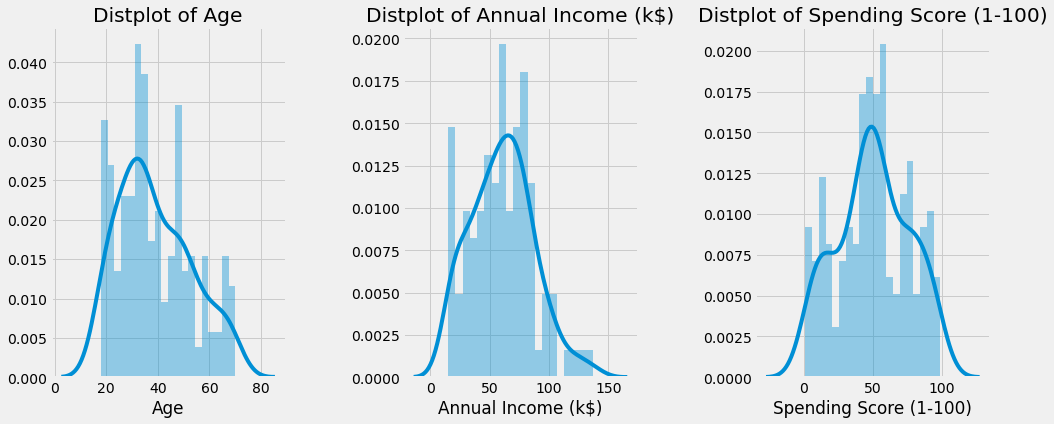

In [10]:
plt.style.use('fivethirtyeight')

plt.figure(1, figsize=(15,6))
n = 0
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n = n+1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[i], bins=20)
    plt.title(f'Distplot of {i}')
plt.show()

#### Endcode Gender Feature

In [11]:
df['Gender_Bin'] = LabelEncoder().fit_transform(df[['Gender']])
df = df.drop(['Gender'], axis=1)

In [12]:
df.rename(columns = {'Annual Income (k$)' : 'Annual_Income',
                     'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)

In [13]:
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


#### Find K Using Elbow Method

Elbow method menentukan jumlah optimal kluster (optimal cluster number) dilihat dari optimal inertia. Melihat intertia dapat dibuat grafik berikut. Nilai kluster optimal ada di bagian siku grafik inertia.

In [14]:
k = range(1,15)
inertia = []

for i in k :
    model = KMeans(n_clusters = i)
    model.fit(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])
    inertia.append(model.inertia_)
    
print(k)
print(inertia)

range(1, 15)
[308862.06, 212889.44245524297, 143391.5923603568, 104414.67534220166, 75399.61541401483, 58350.65449462818, 51165.184237107926, 44392.11566567935, 40948.7929507992, 37588.822837162836, 34706.34507298257, 32174.400721500722, 29820.12532153837, 28059.441783380018]


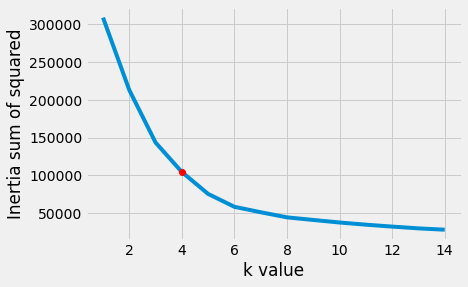

In [20]:
plt.plot(k, inertia)
plt.xlabel('k value')
plt.ylabel('Inertia sum of squared')
plt.plot(k[3], inertia[3], 'ro')
plt.show()

#### Fitting K-Means Model

In [16]:
model_KM = KMeans(n_clusters = 4, max_iter = 10000) #tingkatkan max iter untuk meningkatkan kualitas prediksi
model_KM.fit(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
model_KM.labels_ #mengetahui hasil pengelompokan

array([3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### Predict K

In [21]:
df['cluster'] = model_KM.predict(df[['Age', 'Annual_Income', 'Spending_Score', 'Gender_Bin']])
df.head()

,CustomerID,Age,Annual_Income,Spending_Score,Gender_Bin,cluster
0,1,19,15,39,1,3
1,2,21,15,81,1,3
2,3,20,16,6,0,0
3,4,23,16,77,0,3
4,5,31,17,40,0,0


#### Plotting Cluster

#### a. Age & Annual Income

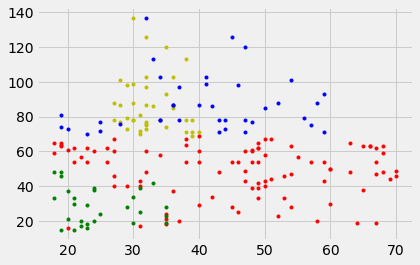

In [22]:
plt.plot(df['Age'][df['cluster']==0], df['Annual_Income'][df['cluster']==0], 'r.')
plt.plot(df['Age'][df['cluster']==1], df['Annual_Income'][df['cluster']==1], 'y.')
plt.plot(df['Age'][df['cluster']==2], df['Annual_Income'][df['cluster']==2], 'b.')
plt.plot(df['Age'][df['cluster']==3], df['Annual_Income'][df['cluster']==3], 'g.')

#### b. Age & Spending Score

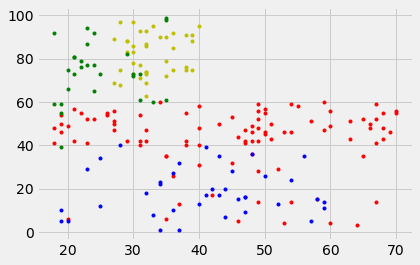

In [23]:
plt.plot(df['Age'][df['cluster']==0], df['Spending_Score'][df['cluster']==0], 'r.')
plt.plot(df['Age'][df['cluster']==1], df['Spending_Score'][df['cluster']==1], 'y.')
plt.plot(df['Age'][df['cluster']==2], df['Spending_Score'][df['cluster']==2], 'b.')
plt.plot(df['Age'][df['cluster']==3], df['Spending_Score'][df['cluster']==3], 'g.')

#### c. Age & Gender

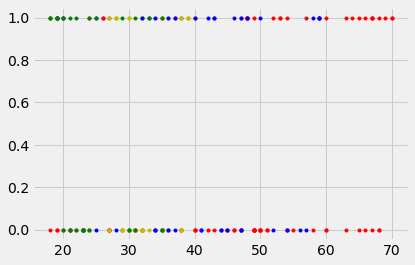

In [24]:
plt.plot(df['Age'][df['cluster']==0], df['Gender_Bin'][df['cluster']==0], 'r.')
plt.plot(df['Age'][df['cluster']==1], df['Gender_Bin'][df['cluster']==1], 'y.')
plt.plot(df['Age'][df['cluster']==2], df['Gender_Bin'][df['cluster']==2], 'b.')
plt.plot(df['Age'][df['cluster']==3], df['Gender_Bin'][df['cluster']==3], 'g.')

### LATIHAN

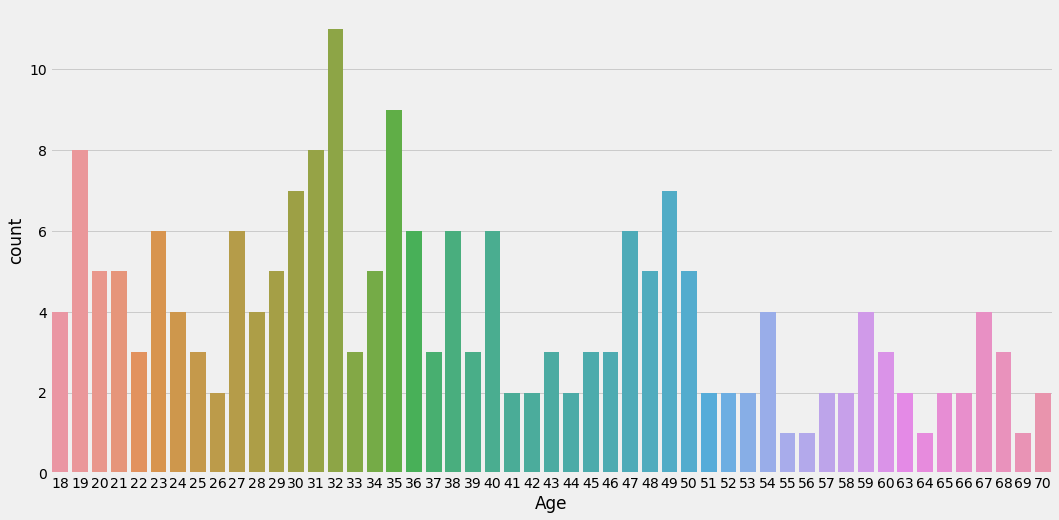

Max Age : 70
Min Age : 18


In [114]:
plt.figure(figsize=(16,8))
sns.countplot(x='Age',data=df)
plt.show()
print('Max Age : {}'.format(df['Age'].max()))
print('Min Age : {}'.format(df['Age'].min()))

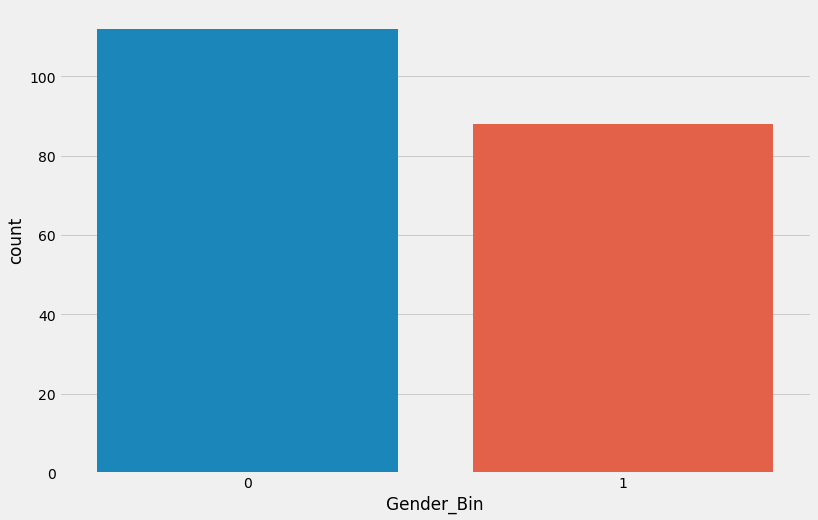

In [50]:
plt.figure(figsize=(12,8))
sns.countplot(x='Gender_Bin',data=df)
plt.show()

In [117]:
df['Gender_Bin'].value_counts()

0    112
1     88
Name: Gender_Bin, dtype: int64

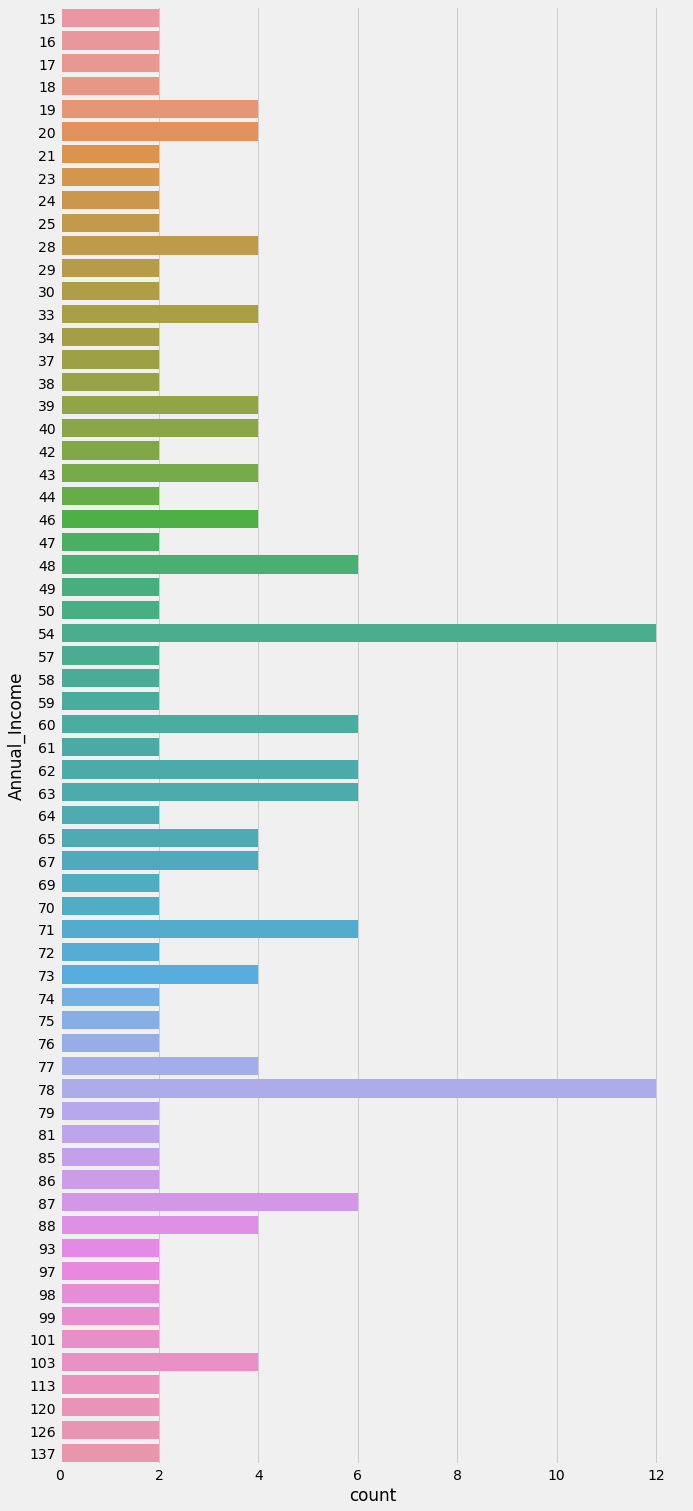

Max Annual Income : 137
Min Annual Income : 15


In [119]:
plt.figure(figsize=(10,25))
sns.countplot(y='Annual_Income',data=df)
plt.show()
print('Max Annual Income : {}'.format(df['Annual_Income'].max()))
print('Min Annual Income : {}'.format(df['Annual_Income'].min()))

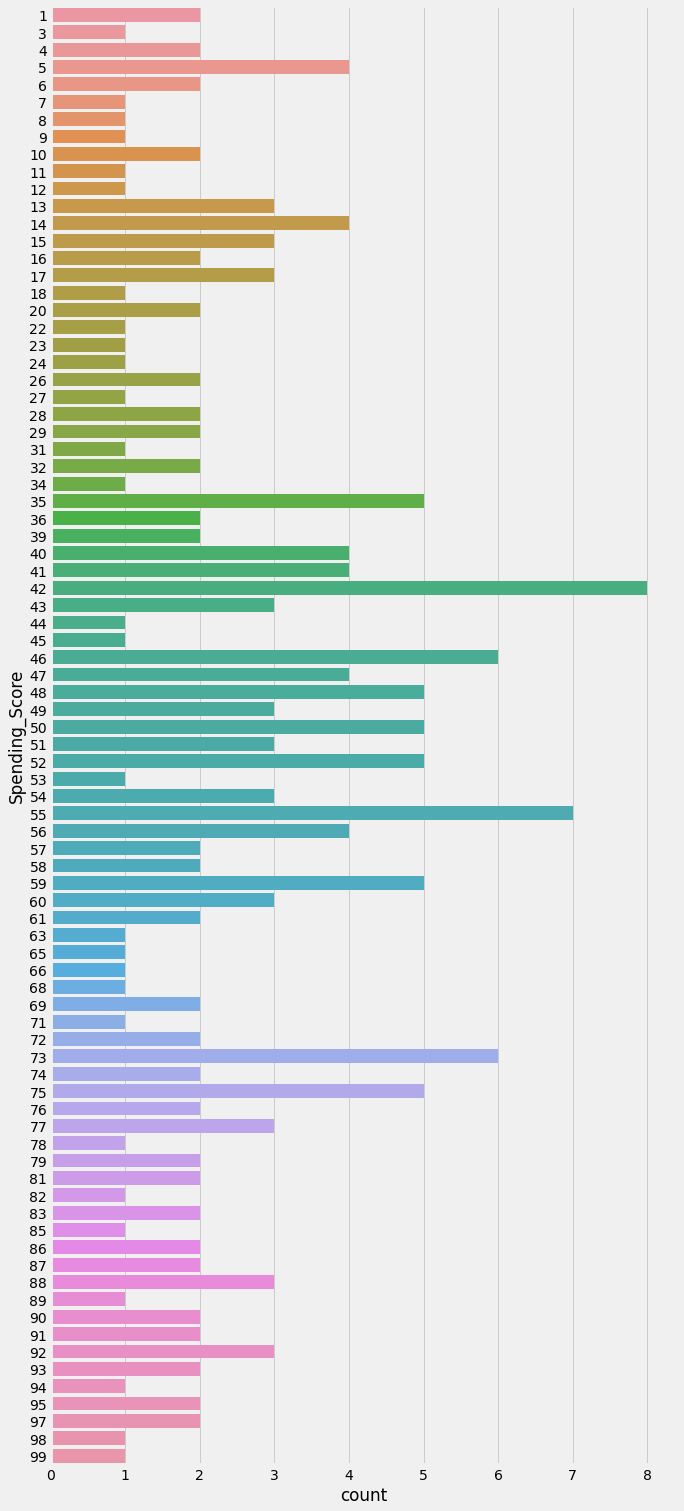

Max Spending Score : 99
Min Spending Score : 1


In [120]:
plt.figure(figsize=(10,25))
sns.countplot(y="Spending_Score",data=df)
plt.show()
print('Max Spending Score : {}'.format(df['Spending_Score'].max()))
print('Min Spending Score : {}'.format(df['Spending_Score'].min()))

In [78]:
c= df.iloc[:,[2,3]]

In [79]:
c.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [80]:
inertia=[]
for i in range (1,11):
    model=KMeans(n_clusters=i)
    model.fit(c)
    inertia.append(model.inertia_)

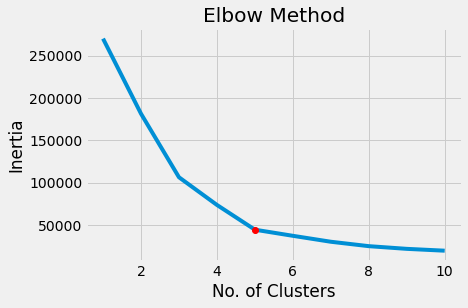

In [92]:
plt.plot(range(1,11),inertia)
plt.xlabel("No. of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.plot(k[4], inertia[4], 'ro')
plt.show()

In [93]:
df['cluster1'] = model_KM.predict(df[['Annual_Income', 'Spending_Score']])

In [100]:
model_KM1 = KMeans(max_iter = 10000)
model_KM.fit(c)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

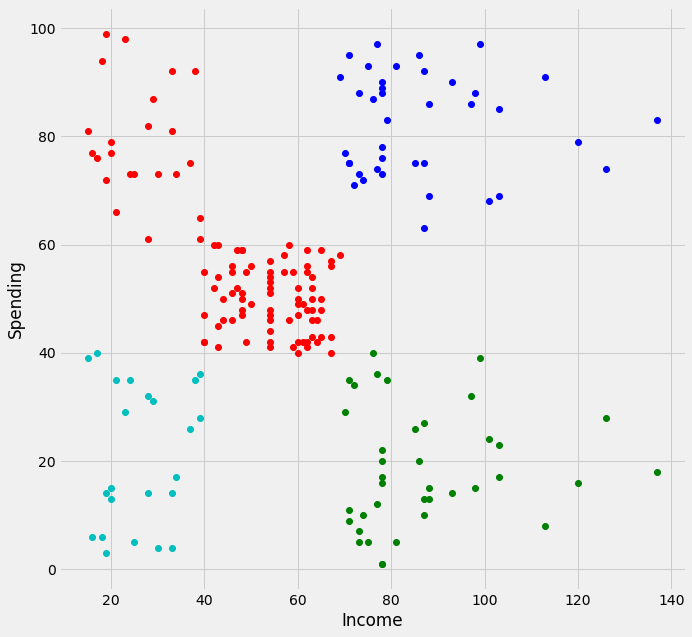

In [127]:
plt.figure(figsize = (10,10))
plt.plot(df['Annual_Income'][df['cluster1']==0], df['Spending_Score'][df['cluster1']==0], 'ro')
plt.plot(df['Annual_Income'][df['cluster1']==1], df['Spending_Score'][df['cluster1']==1], 'bo')
plt.plot(df['Annual_Income'][df['cluster1']==2], df['Spending_Score'][df['cluster1']==2], 'go')
plt.plot(df['Annual_Income'][df['cluster1']==3], df['Spending_Score'][df['cluster1']==3], 'co')

plt.xlabel('Income')
plt.ylabel('Spending')
plt.show()